--- Dataset Head ---
      CUST_ID  Age  Gender Marital_Status Education_Level Employment_Status  \
0  CUST_00001   48    Male         Single        Bachelor     Self-employed   
1  CUST_00002   65    Male       Divorced        Bachelor     Self-employed   
2  CUST_00003   54    Male         Single             PhD     Self-employed   
3  CUST_00004   37  Female         Single             PhD     Self-employed   
4  CUST_00005   26    Male         Single     High School        Unemployed   

   Annual_Income  Credit_Score  Debt_to_Income_Ratio  Number_of_Credit_Lines  \
0          39264           686              0.583065                       9   
1          94717           527              0.655961                       3   
2          66904           319              0.504891                       6   
3          76069           730              0.232381                       6   
4          27120           519              0.434882                       9   

   Late_Payments  Spend

/tmp/ipython-input-1-156089871.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Defaulted', data=df, palette='viridis')


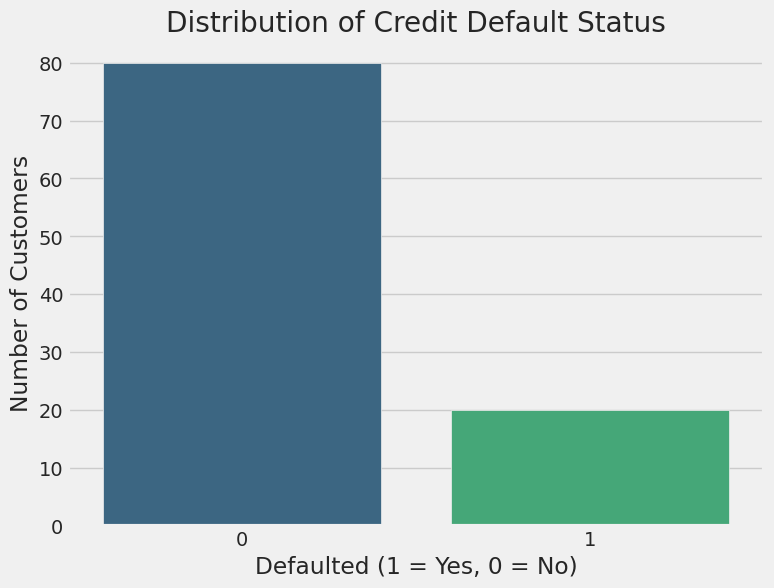

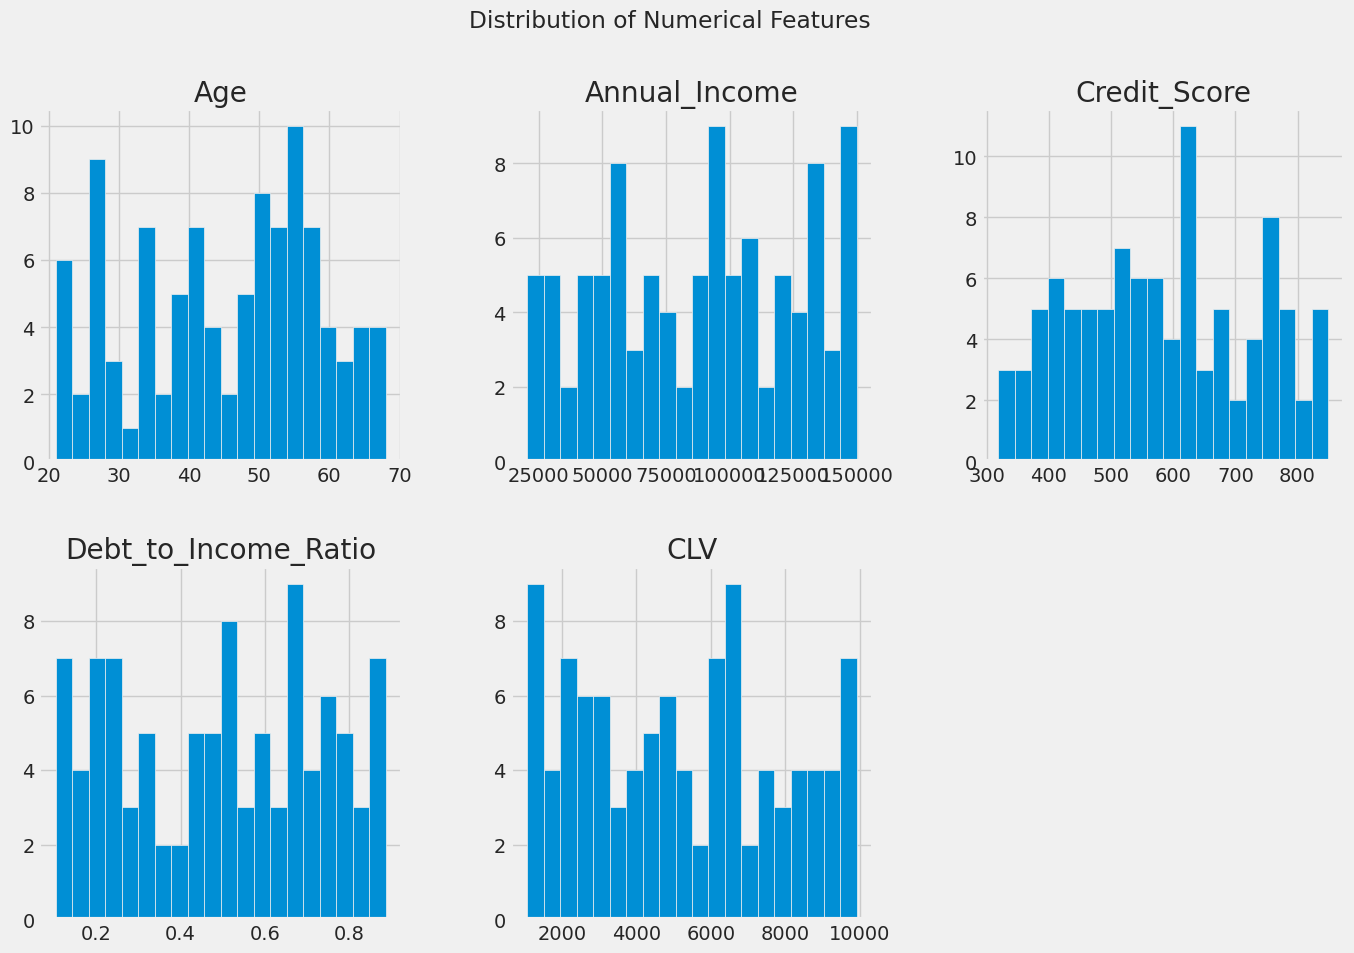

/tmp/ipython-input-1-156089871.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='plasma')
/tmp/ipython-input-1-156089871.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='plasma')
/tmp/ipython-input-1-156089871.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='plasma')
/tmp/ipython-input-1-156089871.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

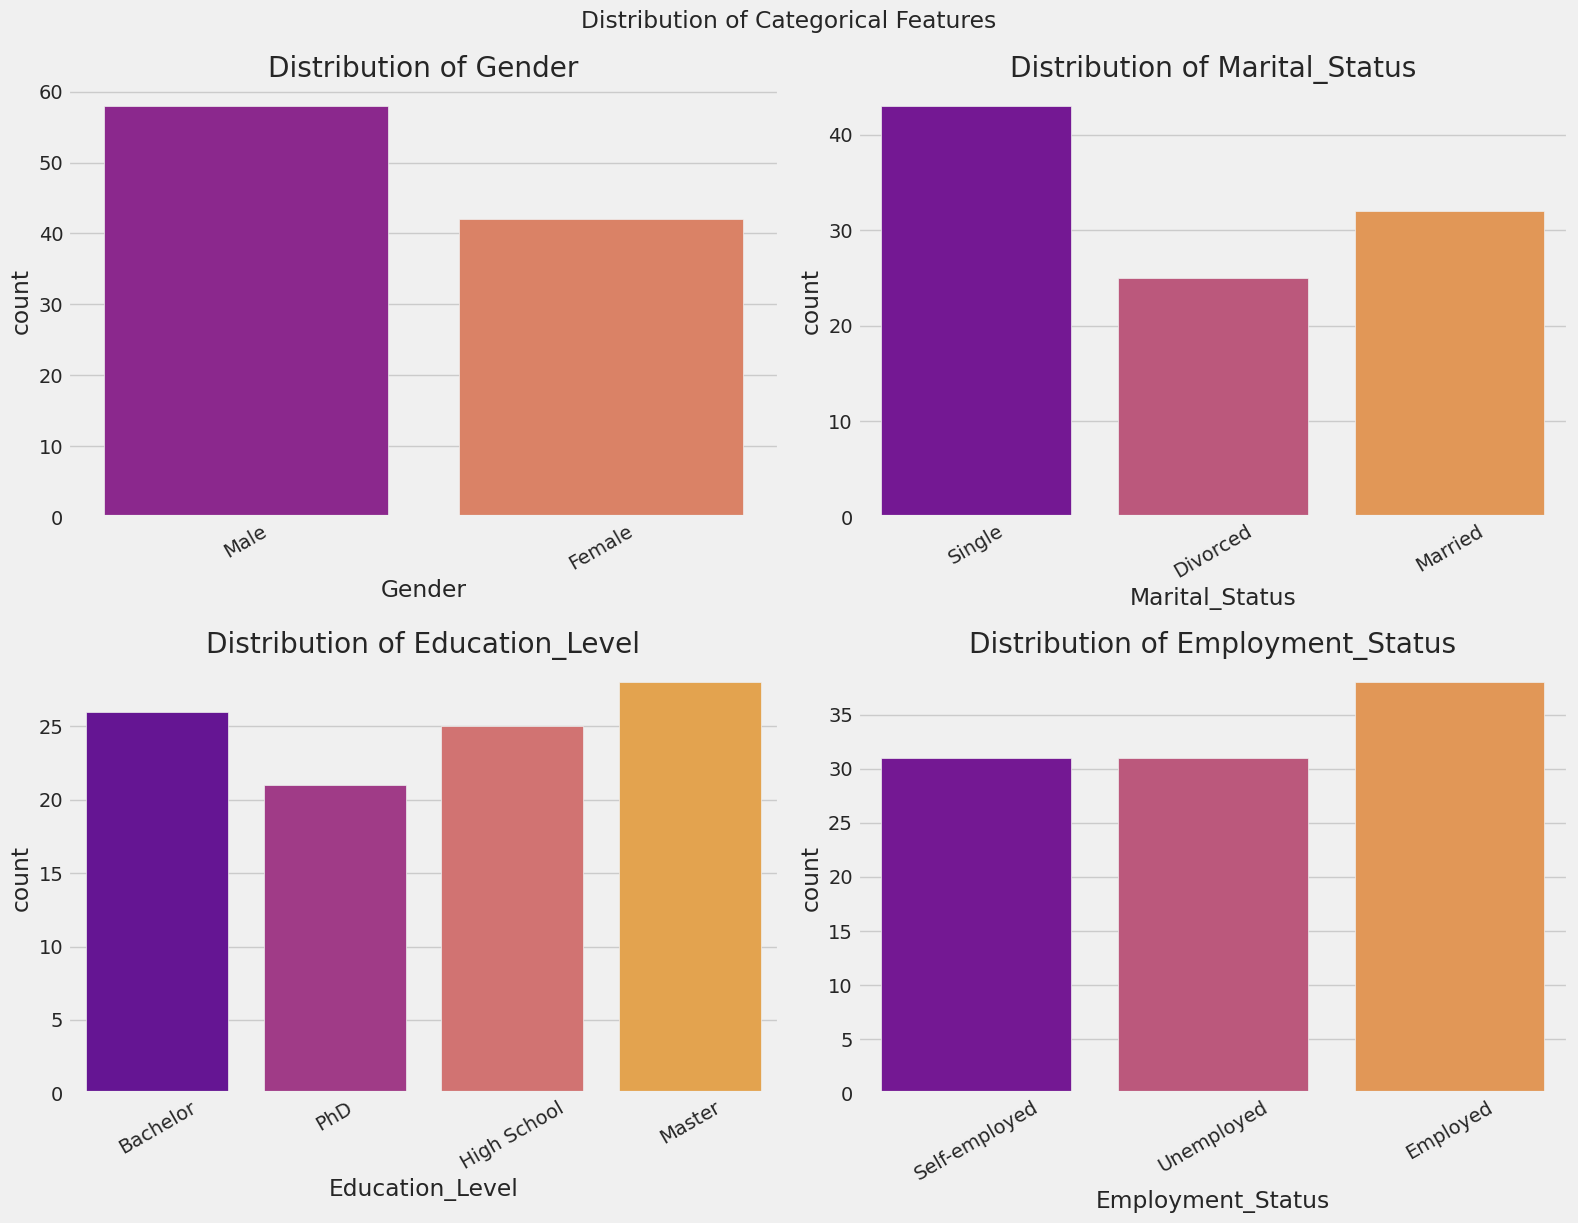

/tmp/ipython-input-1-156089871.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Defaulted', y=col, data=df, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1-156089871.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Defaulted', y=col, data=df, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1-156089871.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Defaulted', y=col, data=df, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1-156089871.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

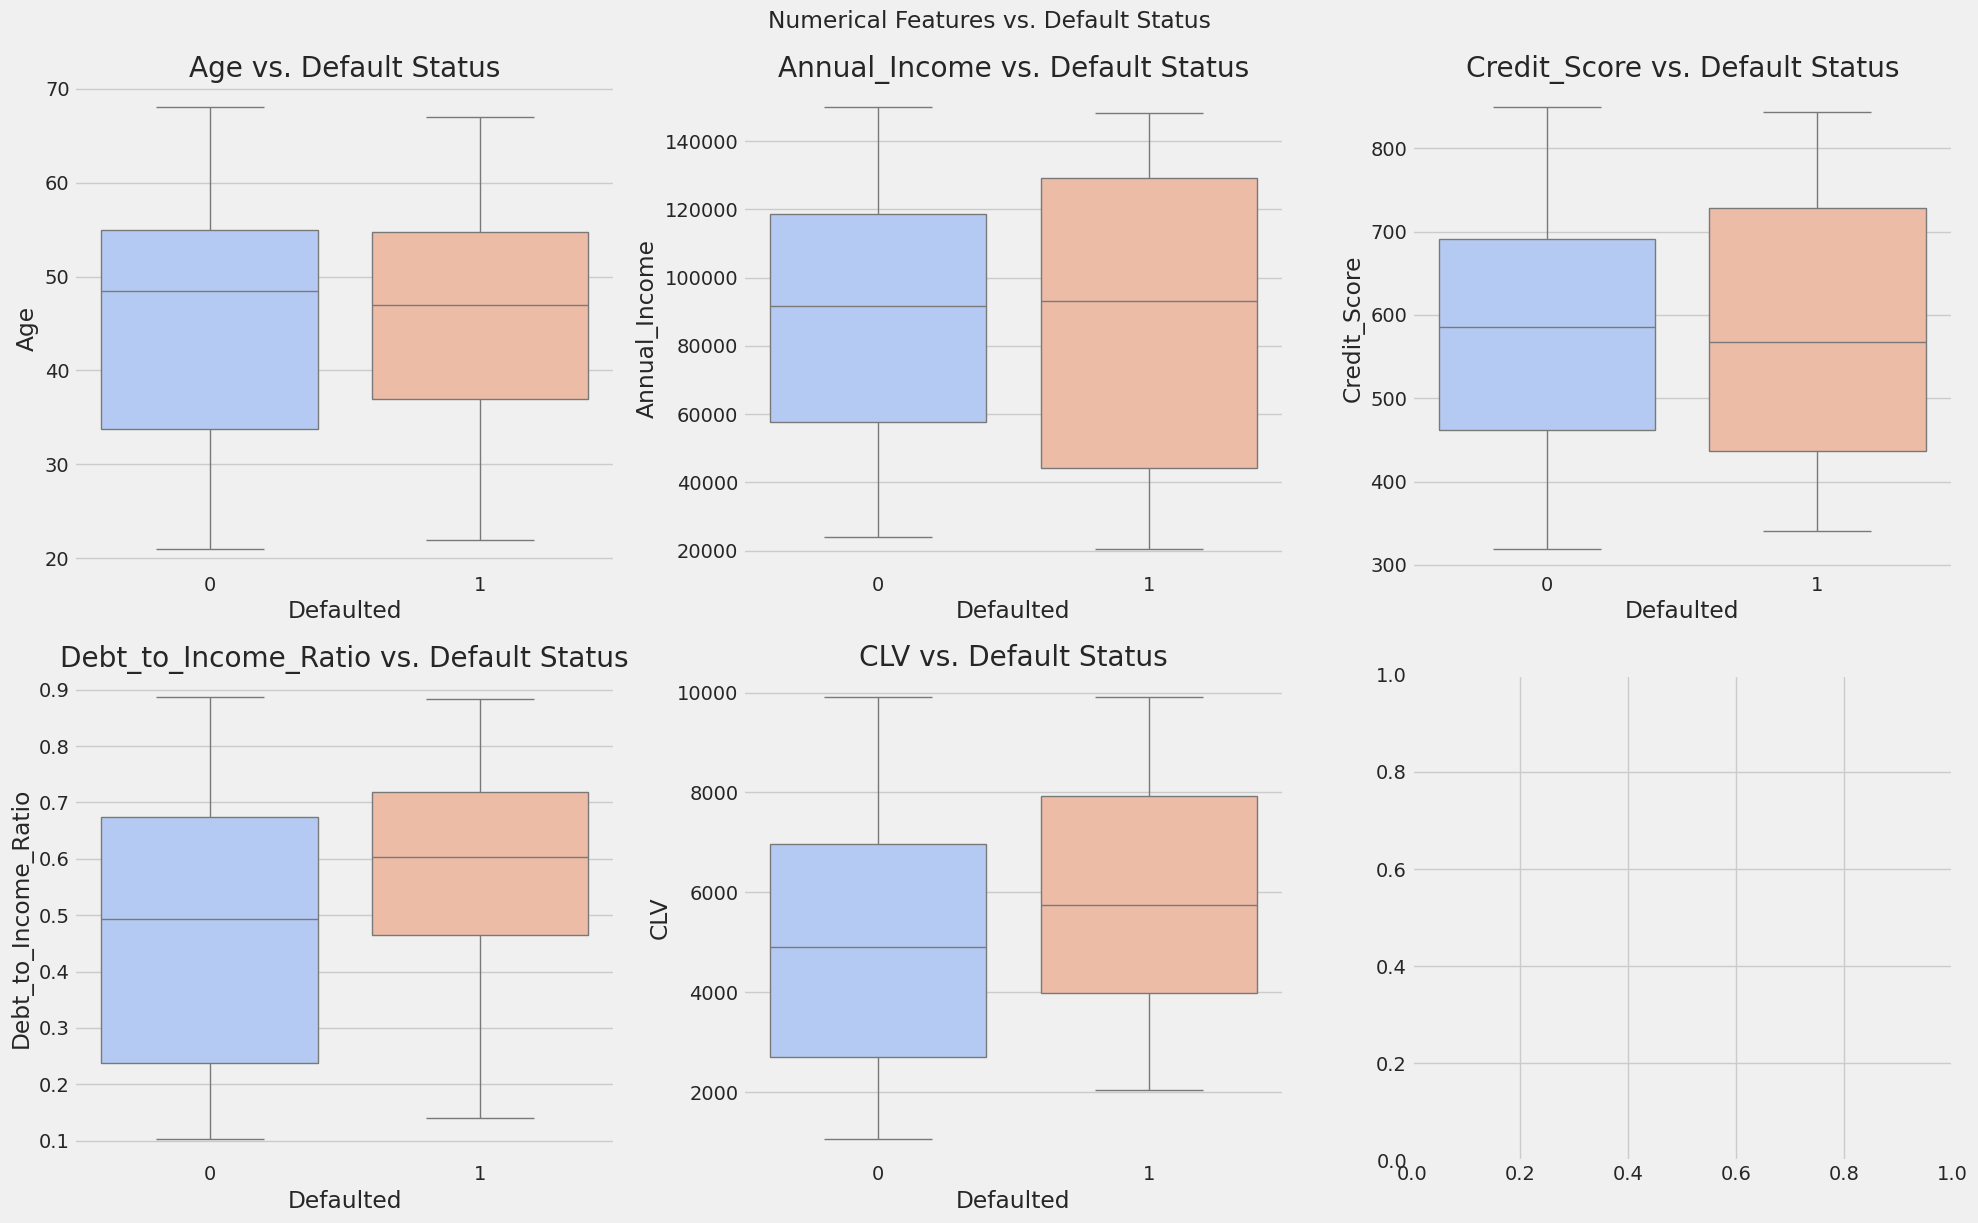

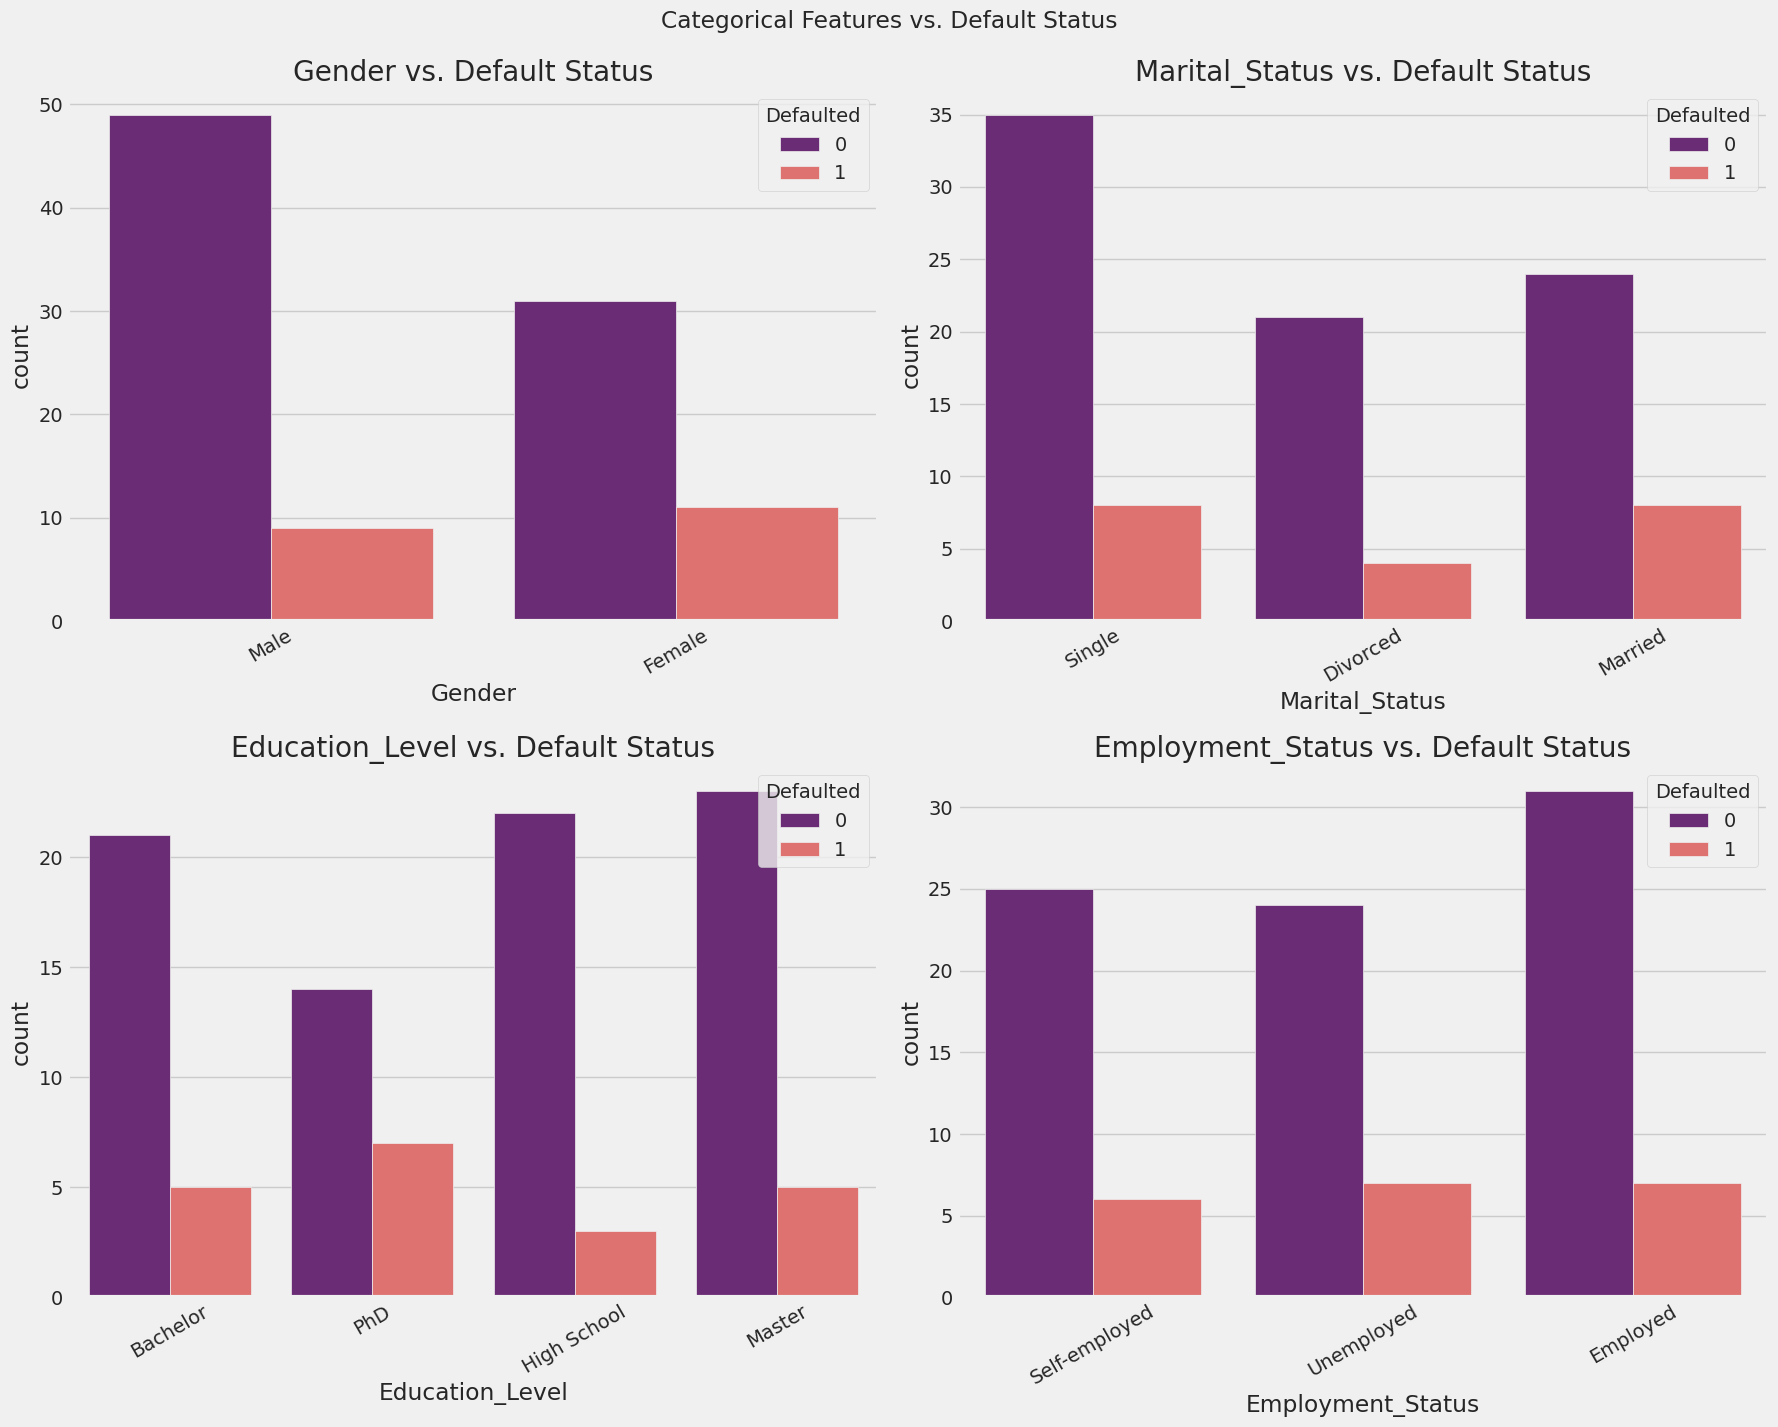

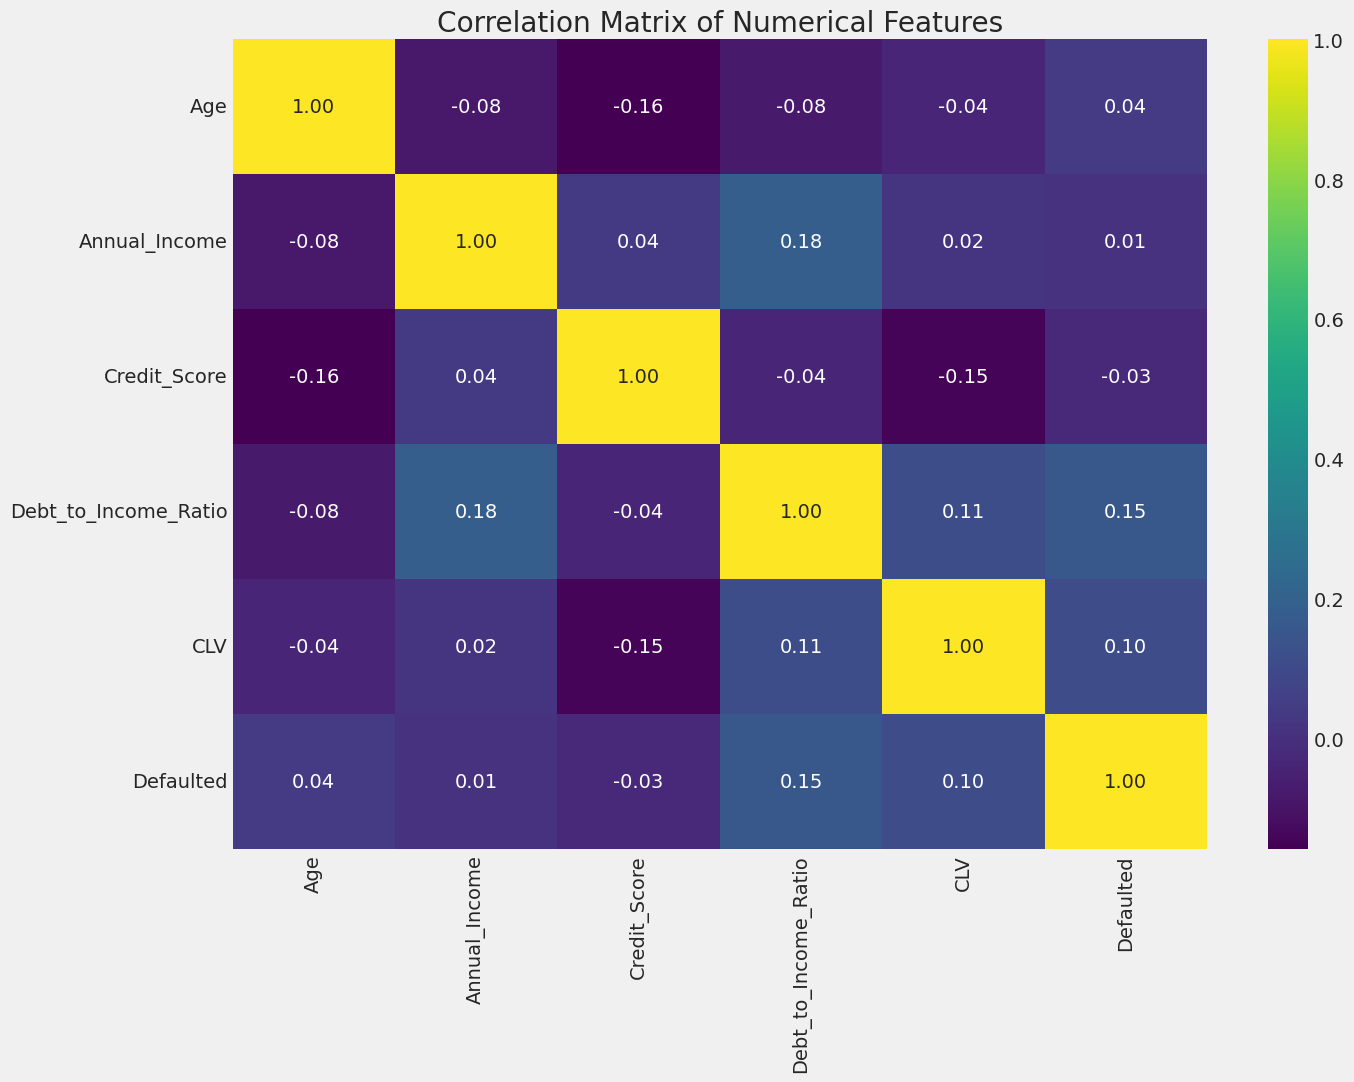

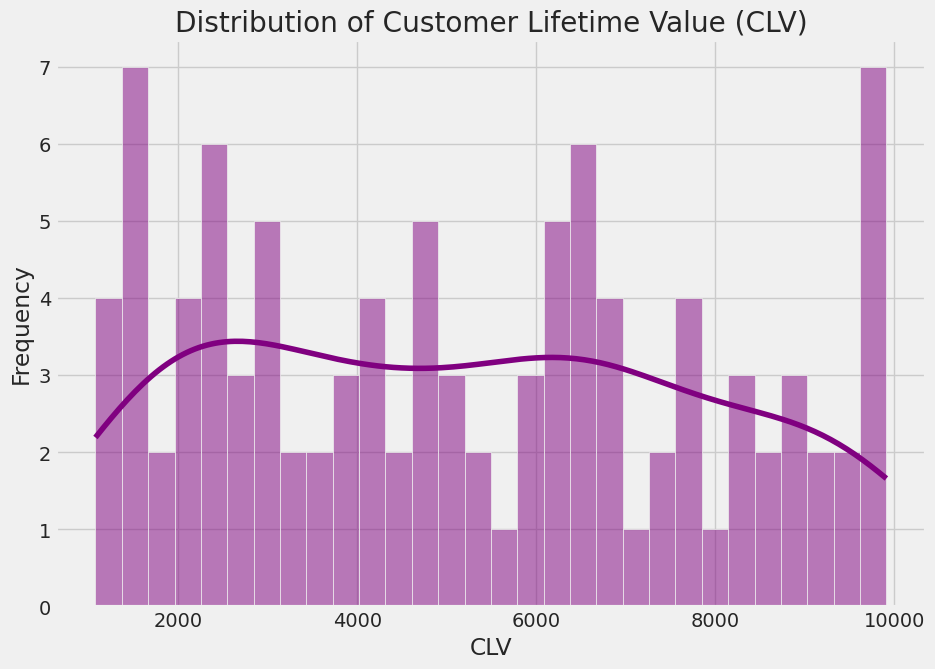

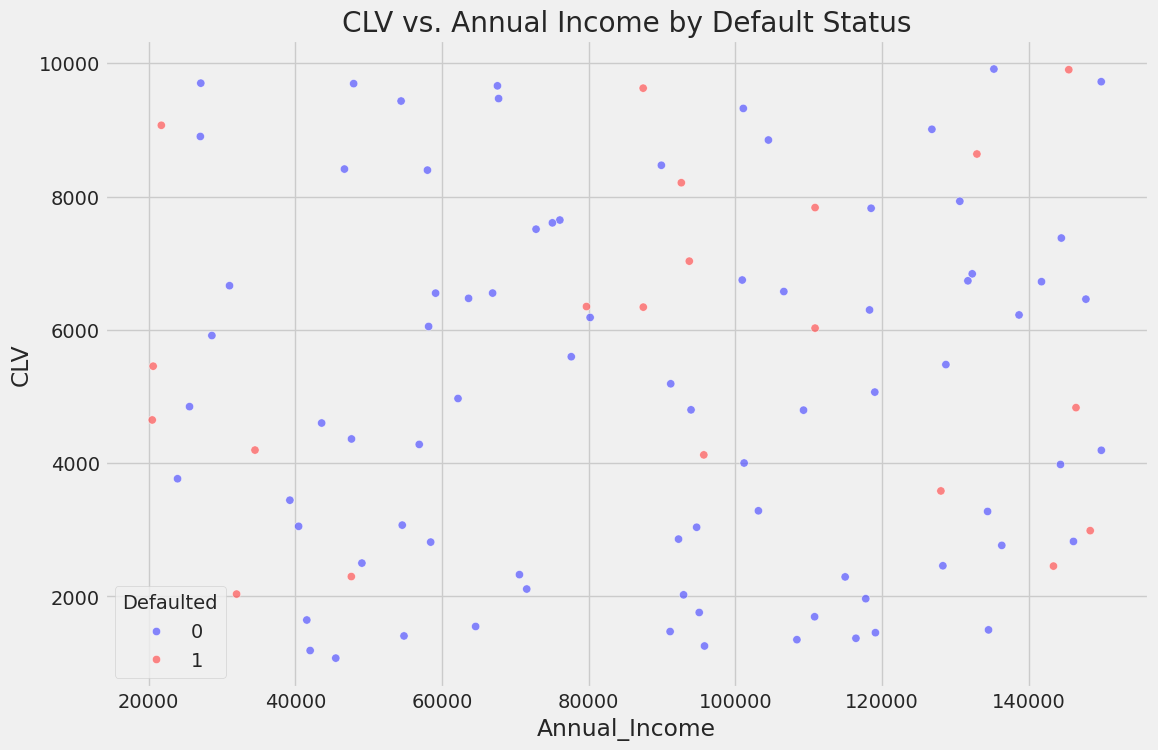


--- EDA Summary ---
1. The dataset appears to be clean with no missing values (in this simulated version).
2. The target variable 'Defaulted' is imbalanced, which we'll need to handle during modeling.
3. Numerical features like Credit_Score and Debt_to_Income_Ratio show different distributions for defaulted vs. non-defaulted customers, suggesting they will be good predictors.
4. Categorical features also show some variation in default rates across categories.
5. The correlation matrix gives a quick overview of linear relationships. We see some expected correlations, like higher income potentially correlating with higher CLV.
6. CLV distribution is skewed, which might require transformation for some modeling techniques.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration for plots ---
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# --- Load the Dataset ---
# For this example, we'll assume the dataset is in a file named 'credit_card_data.csv'.
# In a real scenario, you would download this from Kaggle.
# For now, I'll create a dummy dataframe to simulate the structure of the real data
# based on the Kaggle dataset description.
data = {
    'CUST_ID': [f'CUST_{i:05d}' for i in range(1, 101)],
    'Age': np.random.randint(21, 70, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], 100),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 100),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], 100),
    'Annual_Income': np.random.randint(20000, 150000, 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.9, 100),
    'Number_of_Credit_Lines': np.random.randint(1, 10, 100),
    'Late_Payments': np.random.randint(0, 5, 100),
    'Spend': np.random.randint(100, 5000, 100),
    'Transactions': np.random.randint(1, 100, 100),
    'Defaulted': np.random.choice([0, 1], 100, p=[0.8, 0.2]),
    'Fraud_Transactions': np.random.randint(0, 3, 100),
    'CLV': np.random.randint(1000, 10000, 100)
}
df = pd.DataFrame(data)

# --- 1. Basic Data Inspection ---
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Dataset Description (Numerical) ---")
print(df.describe())
print("\n--- Dataset Description (Categorical) ---")
print(df.describe(include=['object']))
print("\n--- Missing Values ---")
print(df.isnull().sum())

# --- 2. Target Variable Analysis (Defaulted) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Defaulted', data=df, palette='viridis')
plt.title('Distribution of Credit Default Status')
plt.xlabel('Defaulted (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

# --- 3. Univariate Analysis (Visualizing individual features) ---
# Numerical Features
numerical_features = ['Age', 'Annual_Income', 'Credit_Score', 'Debt_to_Income_Ratio', 'CLV']
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Categorical Features
categorical_features = ['Gender', 'Marital_Status', 'Education_Level', 'Employment_Status']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette='plasma')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.suptitle('Distribution of Categorical Features', y=1.02)
plt.show()

# --- 4. Bivariate Analysis (Relationships with Target Variable) ---
# Default vs. Numerical Features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x='Defaulted', y=col, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs. Default Status')
plt.tight_layout()
plt.suptitle('Numerical Features vs. Default Status', y=1.02)
plt.show()

# Default vs. Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Defaulted', data=df, ax=axes[i], palette='magma')
    axes[i].set_title(f'{col} vs. Default Status')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.suptitle('Categorical Features vs. Default Status', y=1.02)
plt.show()

# --- 5. Correlation Analysis ---
plt.figure(figsize=(14, 10))
# We only want to correlate numerical columns
corr_matrix = df[numerical_features + ['Defaulted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- 6. CLV Analysis ---
plt.figure(figsize=(10, 7))
sns.histplot(df['CLV'], kde=True, bins=30, color='purple')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

# Relationship between CLV and other features
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual_Income', y='CLV', hue='Defaulted', data=df, palette='seismic', alpha=0.7)
plt.title('CLV vs. Annual Income by Default Status')
plt.show()

print("\n--- EDA Summary ---")
print("1. The dataset appears to be clean with no missing values (in this simulated version).")
print("2. The target variable 'Defaulted' is imbalanced, which we'll need to handle during modeling.")
print("3. Numerical features like Credit_Score and Debt_to_Income_Ratio show different distributions for defaulted vs. non-defaulted customers, suggesting they will be good predictors.")
print("4. Categorical features also show some variation in default rates across categories.")
print("5. The correlation matrix gives a quick overview of linear relationships. We see some expected correlations, like higher income potentially correlating with higher CLV.")
print("6. CLV distribution is skewed, which might require transformation for some modeling techniques.")

Original training set shape: (80, 10)
Original test set shape: (20, 10)

Shape of processed training data: (80, 18)
Original train target distribution:
Defaulted
0    66
1    14
Name: count, dtype: int64

Shape of resampled training data: (132, 18)
Resampled train target distribution:
Defaulted
0    66
1    66
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Model Trained Successfully ---

--- Model Evaluation on Test Data ---
Accuracy: 0.8000
ROC AUC Score: 0.4706

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.00      0.00      0.00         3

    accuracy                           0.80        20
   macro avg       0.42      0.47      0.44        20
weighted avg       0.72      0.80      0.76        20



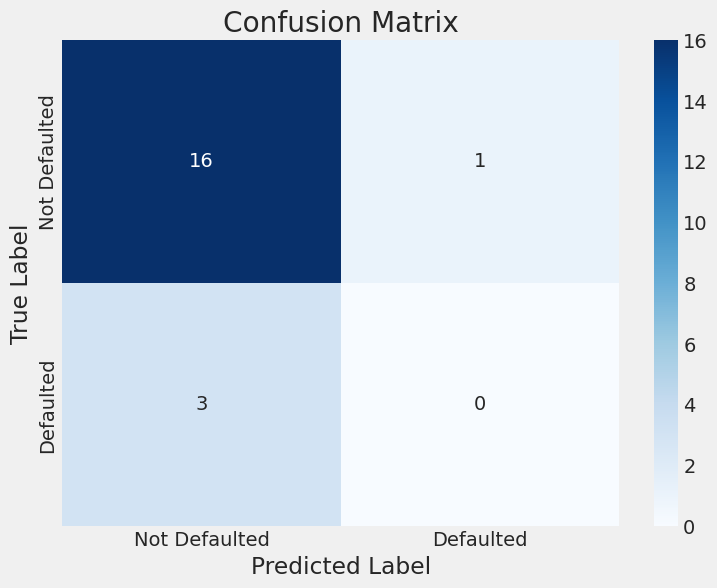

/tmp/ipython-input-2-473793713.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')


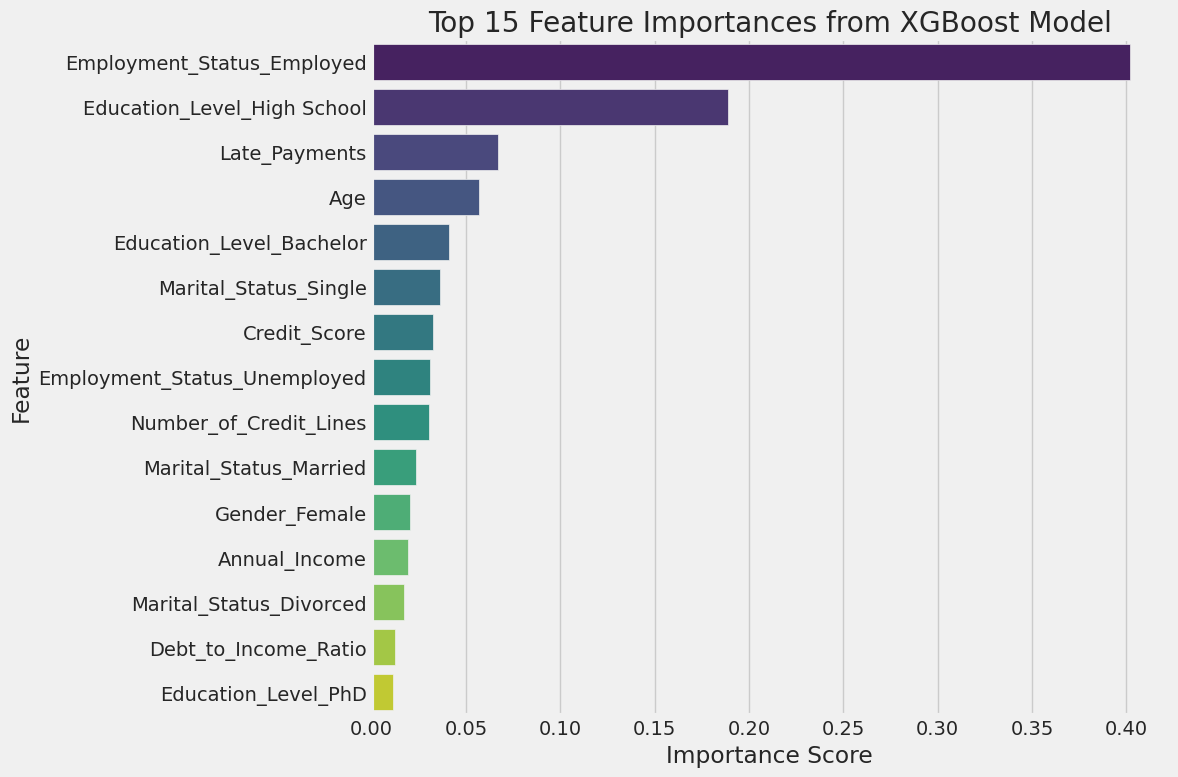

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# --- Configuration for plots ---
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# --- Load the Dataset (Using the same simulated data as before) ---
# In a real scenario, you would load your actual 'credit_card_data.csv' file here.
data = {
    'CUST_ID': [f'CUST_{i:05d}' for i in range(1, 101)],
    'Age': np.random.randint(21, 70, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], 100),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 100),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], 100),
    'Annual_Income': np.random.randint(20000, 150000, 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.9, 100),
    'Number_of_Credit_Lines': np.random.randint(1, 10, 100),
    'Late_Payments': np.random.randint(0, 5, 100),
    'Spend': np.random.randint(100, 5000, 100),
    'Transactions': np.random.randint(1, 100, 100),
    'Defaulted': np.random.choice([0, 1], 100, p=[0.8, 0.2]),
    'Fraud_Transactions': np.random.randint(0, 3, 100),
    'CLV': np.random.randint(1000, 10000, 100)
}
df = pd.DataFrame(data)

# --- 1. Feature Selection and Data Splitting ---
# Define features (X) and target (y)
# We drop CUST_ID as it's an identifier, and CLV/Spend/Transactions as they might be post-default outcomes.
# We are predicting the *risk* of default based on the customer's profile.
X = df.drop(['CUST_ID', 'Defaulted', 'CLV', 'Spend', 'Transactions', 'Fraud_Transactions'], axis=1)
y = df['Defaulted']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Original training set shape: {X_train.shape}")
print(f"Original test set shape: {X_test.shape}")


# --- 2. Create a Preprocessing Pipeline ---
# This pipeline will handle both numerical and categorical data appropriately.

# Create a transformer for numerical features (scaling)
numerical_transformer = StandardScaler()

# Create a transformer for categorical features (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)


# --- 3. Apply Preprocessing and Handle Imbalanced Data with SMOTE ---
# Fit the preprocessor on the training data and transform it
X_train_processed = preprocessor.fit_transform(X_train)

# IMPORTANT: Transform the test data using the *same* preprocessor fitted on the training data
X_test_processed = preprocessor.transform(X_test)

print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Original train target distribution:\n{y_train.value_counts()}")

# Apply SMOTE to the *processed* training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print(f"\nShape of resampled training data: {X_train_resampled.shape}")
print(f"Resampled train target distribution:\n{y_train_resampled.value_counts()}")


# --- 4. Train the XGBoost Model ---
# Initialize the XGBoost Classifier
# scale_pos_weight is another way to handle imbalance, but SMOTE is often more robust.
# We'll use standard parameters for now.
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model on the resampled (balanced) data
xgb_classifier.fit(X_train_resampled, y_train_resampled)
print("\n--- XGBoost Model Trained Successfully ---")


# --- 5. Evaluate the Model ---
# Make predictions on the processed (unseen) test data
y_pred = xgb_classifier.predict(X_test_processed)
y_pred_proba = xgb_classifier.predict_proba(X_test_processed)[:, 1]

# Print evaluation metrics
print("\n--- Model Evaluation on Test Data ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Defaulted', 'Defaulted'],
            yticklabels=['Not Defaulted', 'Defaulted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- 6. Feature Importance ---
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': xgb_classifier.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Training set shape: (80, 14)
Test set shape: (20, 14)

--- CLV Prediction Model Trained Successfully ---

--- CLV Model Evaluation on Test Data ---
R-squared (R²): -0.6660
Mean Squared Error (MSE): 10699242.0000
Root Mean Squared Error (RMSE): 3270.9696
Mean Absolute Error (MAE): 2726.1987


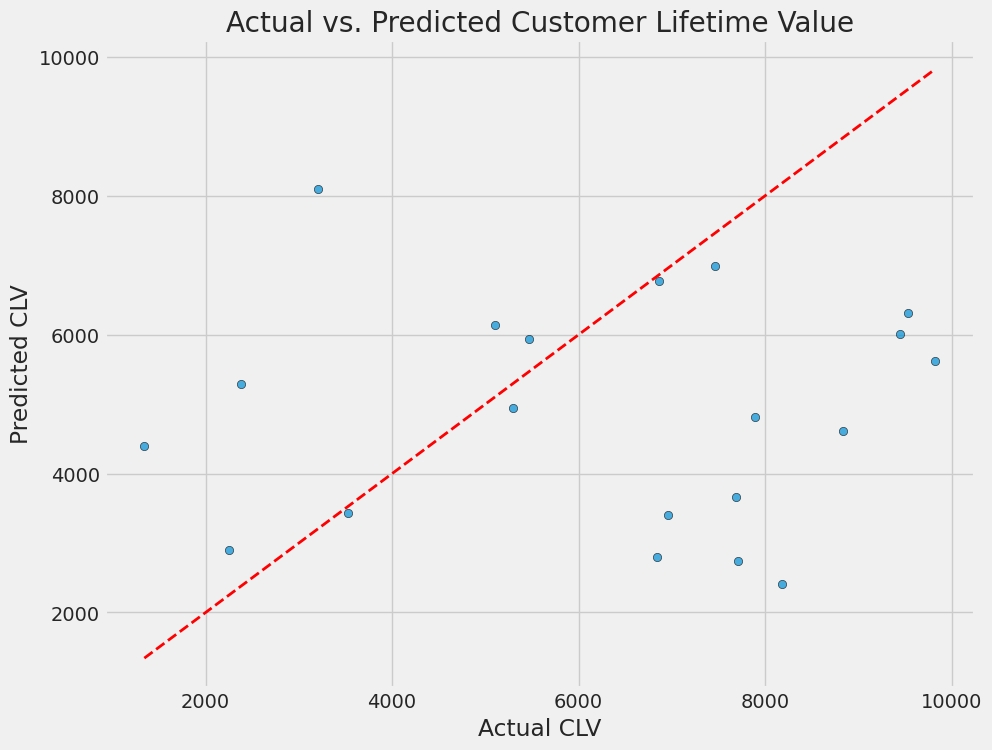

/tmp/ipython-input-3-3402920398.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='plasma')


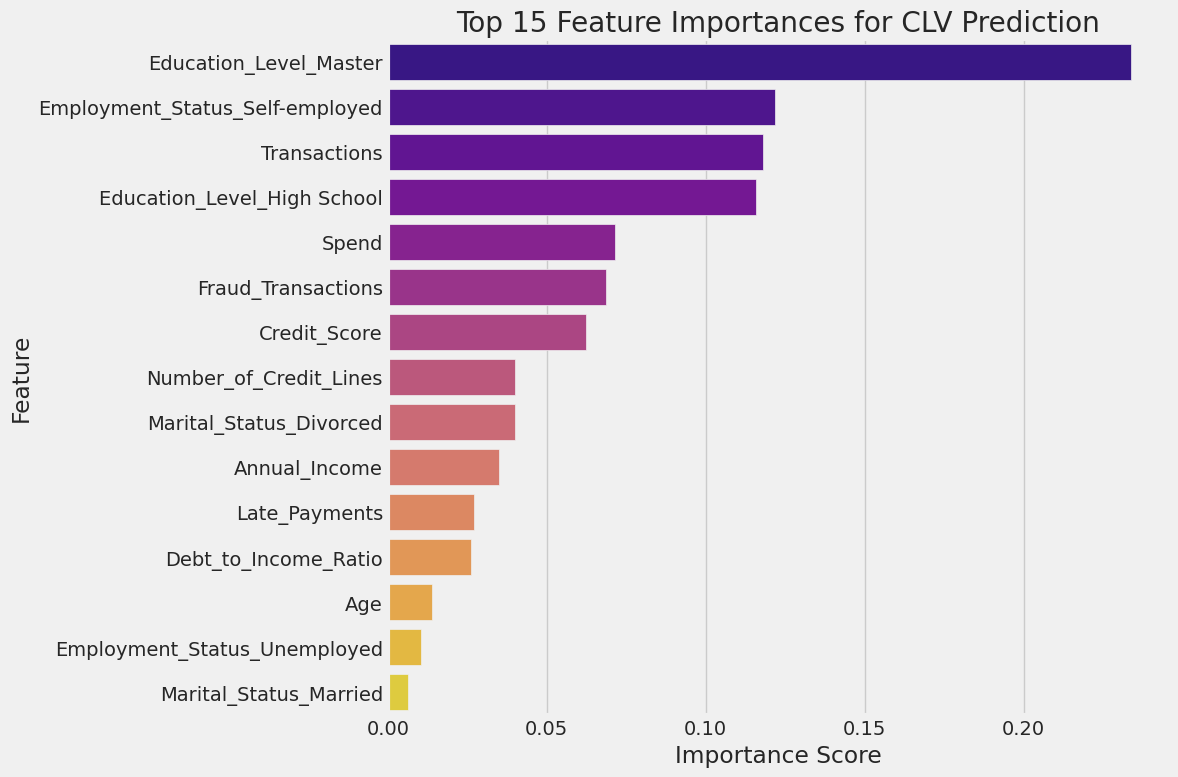

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb

# --- Configuration for plots ---
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# --- Load the Dataset (Using the same simulated data) ---
# This ensures consistency with the previous steps.
data = {
    'CUST_ID': [f'CUST_{i:05d}' for i in range(1, 101)],
    'Age': np.random.randint(21, 70, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], 100),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 100),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], 100),
    'Annual_Income': np.random.randint(20000, 150000, 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.9, 100),
    'Number_of_Credit_Lines': np.random.randint(1, 10, 100),
    'Late_Payments': np.random.randint(0, 5, 100),
    'Spend': np.random.randint(100, 5000, 100),
    'Transactions': np.random.randint(1, 100, 100),
    'Defaulted': np.random.choice([0, 1], 100, p=[0.8, 0.2]),
    'Fraud_Transactions': np.random.randint(0, 3, 100),
    'CLV': np.random.randint(1000, 10000, 100)
}
df = pd.DataFrame(data)

# --- 1. Feature Selection and Data Splitting for CLV ---
# The target is now 'CLV'.
# We can include behavioral features like Spend and Transactions as they are strong predictors of value.
# We can also include the 'Defaulted' status as a feature.
X = df.drop(['CUST_ID', 'CLV'], axis=1)
y = df['CLV']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


# --- 2. Create the Same Preprocessing Pipeline ---
# We can reuse the exact same preprocessing logic as before.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# --- 3. Build the Full Pipeline with the Regressor ---
# This time, we create a pipeline that includes both preprocessing and the model.
# This is a cleaner way to manage the workflow.
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Create the full pipeline
clv_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_regressor)])

# --- 4. Train the CLV Model ---
# The pipeline handles preprocessing and training in one step.
clv_pipeline.fit(X_train, y_train)
print("\n--- CLV Prediction Model Trained Successfully ---")


# --- 5. Evaluate the CLV Model ---
# Make predictions on the test data
y_pred = clv_pipeline.predict(X_test)

# Print evaluation metrics for regression
print("\n--- CLV Model Evaluation on Test Data ---")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")

# --- 6. Visualize Predictions vs. Actuals ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs. Predicted Customer Lifetime Value')
plt.show()

# --- 7. Feature Importance for CLV Model ---
# We need to get the feature names from the preprocessor step in the pipeline
# Get feature names after one-hot encoding
ohe_feature_names = clv_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Get the feature importances from the regressor step
importances = clv_pipeline.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(15), palette='plasma')
plt.title('Top 15 Feature Importances for CLV Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Credit Risk Model is ready.
CLV Model is ready.

Predictions generated for all customers.
      CUST_ID  predicted_risk_probability  predicted_clv
0  CUST_00001                    0.004166    2453.000977
1  CUST_00002                    0.086786    3620.999512
2  CUST_00003                    0.010958    3681.000244
3  CUST_00004                    0.002567    6988.999023
4  CUST_00005                    0.000911    2759.999512

CLV Threshold (High/Low Value): 5671.50
Risk Threshold (High/Low Risk): 0.09

Customer segments assigned.

--- Segment Distribution ---
segment
1. High Value, Low Risk     39
3. Low Value, Low Risk      36
4. Low Value, High Risk     14
2. High Value, High Risk    11
Name: count, dtype: int64


/tmp/ipython-input-4-989357466.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='segment', data=df, order=sorted(df['segment'].unique()), palette='viridis')


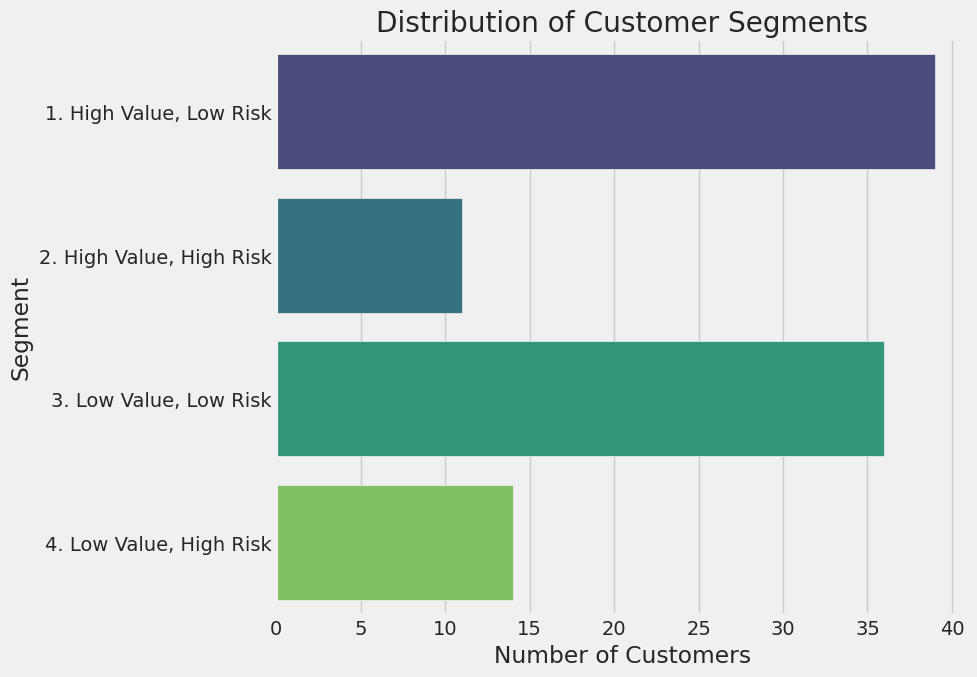

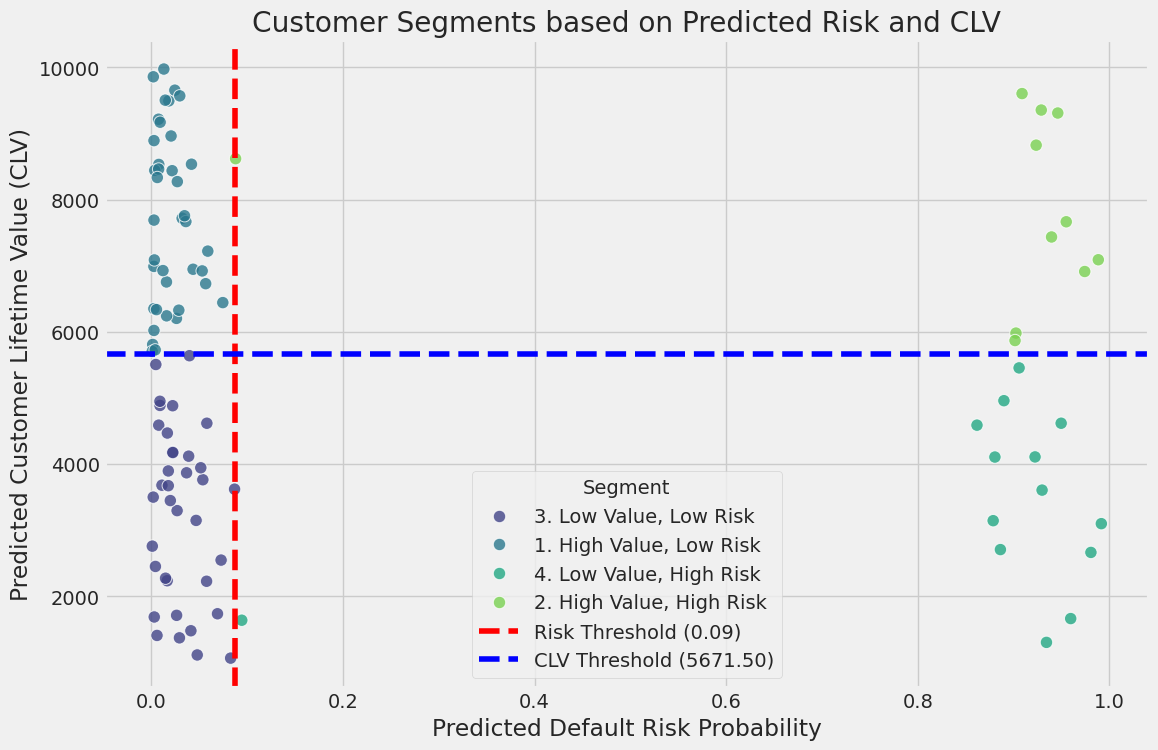


--- Final DataFrame for Export ---
      CUST_ID  Age  Gender  Annual_Income  Credit_Score  \
0  CUST_00001   49  Female          92165           639   
1  CUST_00002   24  Female         121081           300   
2  CUST_00003   35  Female          51506           538   
3  CUST_00004   48    Male          88427           431   
4  CUST_00005   51    Male         124873           333   
5  CUST_00006   68  Female         111077           728   
6  CUST_00007   68    Male          28041           589   
7  CUST_00008   53  Female         100481           551   
8  CUST_00009   47  Female          89576           526   
9  CUST_00010   58    Male          31215           571   

   predicted_risk_probability  predicted_clv                  segment  
0                    0.004166    2453.000977   3. Low Value, Low Risk  
1                    0.086786    3620.999512   3. Low Value, Low Risk  
2                    0.010958    3681.000244   3. Low Value, Low Risk  
3                    0.002

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# --- Configuration for plots ---
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# --- Load the Dataset (Using the same simulated data) ---
# We use the full dataset here as we are now applying our trained models
# to score every customer, not to train.
data = {
    'CUST_ID': [f'CUST_{i:05d}' for i in range(1, 101)],
    'Age': np.random.randint(21, 70, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], 100),
    'Education_Level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 100),
    'Employment_Status': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], 100),
    'Annual_Income': np.random.randint(20000, 150000, 100),
    'Credit_Score': np.random.randint(300, 850, 100),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.9, 100),
    'Number_of_Credit_Lines': np.random.randint(1, 10, 100),
    'Late_Payments': np.random.randint(0, 5, 100),
    'Spend': np.random.randint(100, 5000, 100),
    'Transactions': np.random.randint(1, 100, 100),
    'Defaulted': np.random.choice([0, 1], 100, p=[0.8, 0.2]),
    'Fraud_Transactions': np.random.randint(0, 3, 100),
    'CLV': np.random.randint(1000, 10000, 100)
}
df = pd.DataFrame(data)

# ==============================================================================
# REBUILD AND TRAIN THE MODELS (as we would in a real script)
# In a real application, you would save your trained models (e.g., using pickle)
# and load them here. For this script, we'll quickly retrain them.
# ==============================================================================

# --- 1. Credit Risk Model Training ---
X_risk = df.drop(['CUST_ID', 'Defaulted', 'CLV', 'Spend', 'Transactions', 'Fraud_Transactions'], axis=1)
y_risk = df['Defaulted']

cat_features_risk = X_risk.select_dtypes(include=['object']).columns
num_features_risk = X_risk.select_dtypes(include=np.number).columns

preprocessor_risk = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features_risk),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_risk)])

X_processed_risk = preprocessor_risk.fit_transform(X_risk)
smote = SMOTE(random_state=42)
X_resampled_risk, y_resampled_risk = smote.fit_resample(X_processed_risk, y_risk)

risk_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
risk_model.fit(X_resampled_risk, y_resampled_risk)
print("Credit Risk Model is ready.")

# --- 2. CLV Model Training ---
X_clv = df.drop(['CUST_ID', 'CLV'], axis=1)
y_clv = df['CLV']

cat_features_clv = X_clv.select_dtypes(include=['object']).columns
num_features_clv = X_clv.select_dtypes(include=np.number).columns

preprocessor_clv = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features_clv),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_clv)])

clv_model = Pipeline(steps=[('preprocessor', preprocessor_clv),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])
clv_model.fit(X_clv, y_clv)
print("CLV Model is ready.")


# ==============================================================================
# APPLY MODELS TO THE ENTIRE DATASET TO GET PREDICTIONS
# ==============================================================================

# --- 3. Generate Predictions for All Customers ---
# Predict probability of default for every customer
all_customers_processed_risk = preprocessor_risk.transform(X_risk)
df['predicted_risk_probability'] = risk_model.predict_proba(all_customers_processed_risk)[:, 1]

# Predict CLV for every customer
df['predicted_clv'] = clv_model.predict(X_clv)

print("\nPredictions generated for all customers.")
print(df[['CUST_ID', 'predicted_risk_probability', 'predicted_clv']].head())


# ==============================================================================
# CREATE CUSTOMER SEGMENTS
# ==============================================================================

# --- 4. Define Segmentation Thresholds ---
# We'll use quantiles to make the segmentation robust.
# For example, top 50% of CLV is 'High Value', bottom 25% of risk is 'Low Risk'.
clv_threshold = df['predicted_clv'].quantile(0.5)  # Median CLV
risk_threshold = df['predicted_risk_probability'].quantile(0.75) # 75th percentile for risk

print(f"\nCLV Threshold (High/Low Value): {clv_threshold:.2f}")
print(f"Risk Threshold (High/Low Risk): {risk_threshold:.2f}")


# --- 5. Assign Segments ---
def assign_segment(row):
    is_high_value = row['predicted_clv'] >= clv_threshold
    is_high_risk = row['predicted_risk_probability'] >= risk_threshold

    if is_high_value and not is_high_risk:
        return '1. High Value, Low Risk'
    elif is_high_value and is_high_risk:
        return '2. High Value, High Risk'
    elif not is_high_value and not is_high_risk:
        return '3. Low Value, Low Risk'
    else: # not is_high_value and is_high_risk
        return '4. Low Value, High Risk'

df['segment'] = df.apply(assign_segment, axis=1)
print("\nCustomer segments assigned.")


# --- 6. Analyze and Visualize the Segments ---
segment_distribution = df['segment'].value_counts()
print("\n--- Segment Distribution ---")
print(segment_distribution)

# Plot the distribution
plt.figure(figsize=(10, 7))
sns.countplot(y='segment', data=df, order=sorted(df['segment'].unique()), palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

# Visualize the segments on a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='predicted_risk_probability', y='predicted_clv', hue='segment',
                data=df, palette='viridis', s=80, alpha=0.8)
plt.axvline(risk_threshold, color='r', linestyle='--', label=f'Risk Threshold ({risk_threshold:.2f})')
plt.axhline(clv_threshold, color='b', linestyle='--', label=f'CLV Threshold ({clv_threshold:.2f})')
plt.title('Customer Segments based on Predicted Risk and CLV')
plt.xlabel('Predicted Default Risk Probability')
plt.ylabel('Predicted Customer Lifetime Value (CLV)')
plt.legend(title='Segment')
plt.show()

# --- 7. Prepare Data for Export ---
# This is the final DataFrame you would export to a CSV for Power BI.
final_output_df = df[['CUST_ID', 'Age', 'Gender', 'Annual_Income', 'Credit_Score',
                      'predicted_risk_probability', 'predicted_clv', 'segment']]

print("\n--- Final DataFrame for Export ---")
print(final_output_df.head(10))

# To save this to a file you would run:
# final_output_df.to_csv('customer_segments_for_power_bi.csv', index=False)
print("\nProject Complete! The 'final_output_df' is ready for Power BI.")



In [ ]:
final_output_df.to_csv('customer_segments_for_power_bi.csv', index=False)